<a href="https://colab.research.google.com/github/darthfelipe21/tf_practice/blob/main/TF_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
try:
  !tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/bin/bash: line 1: tensorflow_version: command not found


In [5]:
# Get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-08-21 21:35:53--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-08-21 21:35:53 (23.9 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [10]:
# Carga la Data
data = pd.read_csv('moore.csv', header=None).to_numpy()

data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [15]:
data[:,0]

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976, 1976,
       1978, 1978, 1979, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1984,
       1985, 1985, 1985, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988,
       1988, 1989, 1989, 1989, 1989, 1990, 1991, 1991, 1992, 1992, 1993,
       1993, 1994, 1994, 1995, 1999, 1995, 1996, 1997, 1997, 1997, 1998,
       1999, 1999, 2000, 2000, 1999, 1999, 1999, 2000, 2001, 2001, 2002,
       2004, 2004, 2005, 2006, 2005, 2006, 2007, 2008, 2003, 2003, 2002,
       2005, 2005, 2006, 2007, 2003, 2008, 2009, 2011, 2012, 2007, 2007,
       2008, 2004, 2007, 2008, 2008, 2007, 2009, 2010, 2012, 2013, 2011,
       2010, 2010, 2012, 2012, 2010, 2012, 2014, 2006, 2015, 2013, 2015,
       2008, 2010, 2014, 2015, 2015, 2012, 2011, 2010, 2014, 2011, 2012,
       2014, 2016, 2017, 2017, 2018, 2012, 2016, 2016, 2015, 2013, 2017,
       2014, 2017, 2017, 2017, 2012, 2013, 2014, 2017, 2018, 2016, 2018,
       2017, 2018, 2017, 2015, 2017, 2016, 2017, 20

In [16]:
# Transformar en array de 1 columna con varias filas (N x D) Evita errores como “expected 2D array, got 1D array instead”
data[:,0].reshape(-1, 1)

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [17]:
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

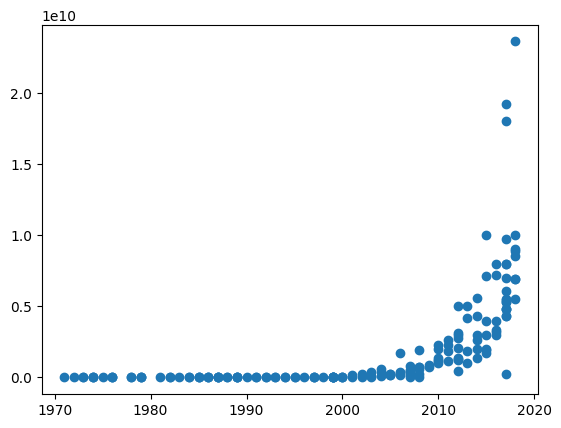

In [18]:
# plot la data
plt.scatter(X, Y)
plt.show()

In [22]:
# Como lo valores son elevados, se aplica un logaritmo para normalizar un poco lo valores y poder tener una
Y = np.log(Y)
Y

array([0.71612492, 0.74160761, 0.72134672, 0.72134672, 0.75071352,
       0.75595265, 0.7865469 , 0.74177411, 0.76178052, 0.78960398,
       0.77584452, 0.79245912, 0.84574755, 0.82387363, 0.84574755,
       0.87937702, 0.8044145 , 0.87135449, 0.90364049, 0.83398023,
       0.87651443, 0.9153793 , 0.92730538, 0.83948256, 0.81982275,
       0.8967877 , 0.93693653, 0.84716044, 0.93773882, 0.95656817,
       0.92707472, 0.94855124, 0.91359282, 0.92427868, 0.95093028,
       0.96538253, 0.96991312, 0.93106454, 0.9703631 , 0.97353332,
       0.85350219, 0.95093028, 0.96246278, 0.99238913, 0.99491882,
       0.94989255, 0.98954436, 0.98954436, 0.89710551, 1.00874089,
       1.00289412, 1.02243028, 1.0159308 , 1.01956184, 1.0159308 ,
       1.02128304, 1.02904443, 1.03848922, 1.03848922, 1.04401562,
       1.03878686, 1.03946412, 1.05265042, 1.08112705, 1.05401859,
       1.05795729, 1.07144915, 1.09394614, 1.07894061, 1.08046194,
       1.08425769, 1.09225269, 1.09896955, 1.05487721, 1.05770

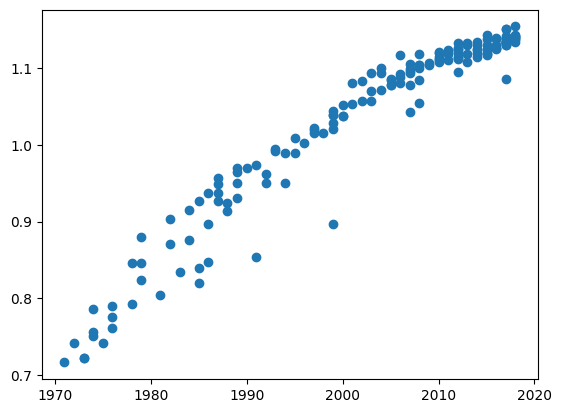

In [23]:
plt.scatter(X, Y)
plt.show()

In [27]:
# Reducir o desplzar los numeros elevados a medidas mas bajas, ya que numeros muy altos pueden alterar o hacer la predicciones mas complicadas
X = X - X.mean()

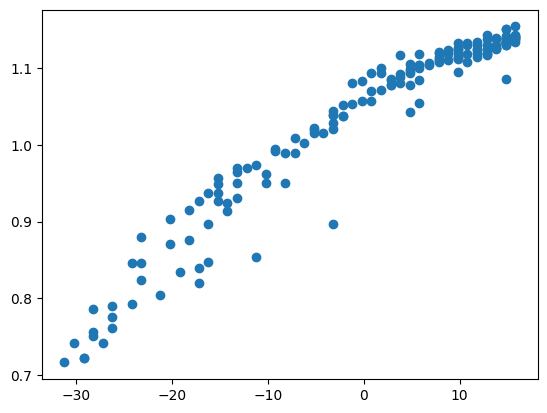

In [28]:
plt.scatter(X, Y)
plt.show()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [31]:
# Si los datos se hubiesen escalado, hubiesemos usado optimizador 'adam'
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), # LearningRate y Momentum
    loss='mse',
)

In [32]:
def schedule(epoch, learningRate):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [33]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 83.5395 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.5958 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.6625 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.3616 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1071 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7226 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7022 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3720 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3033 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4140 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1939 - learning_rate: 0.0010
Epoch 12/200
6/6 ━━━━━━━━

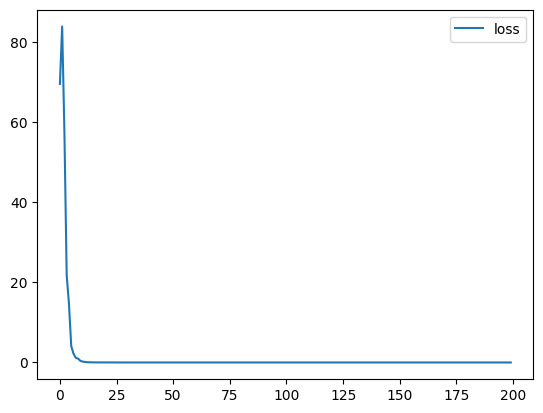

In [34]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show()

In [36]:
model.layers[0].get_weights()

[array([[0.0084564]], dtype=float32), array([1.0343887], dtype=float32)]

In [39]:
a=model.layers[0].get_weights()[0][0,0]
print(a)

0.008456397


Our original model for exponential growth is:

      C = A0r†

Where C is transistor the count and t is the year.

r is the rate of growth. For example, when t goes from 1 to 2, C increases by a factor of r. When t goes from 2 to 3, C increases by a factor of r again.

When we take the log of both sides, we get:

      log C = log r * t + log A0

This is our linear equation:

      ŷ = ax+b

Where:

      ŷ = log C
      a = log r
      x = t
      b = log A0

We are interested in r, because that's the rate gorwth. Given our regression weights we know that:

      a = 0.008456397

So that:

      r = e0.008456397

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for C to increase to 2C.

Let's call the original starting time t, to correspond with the initial transitor count C.

Let's call the end time t', to correspond with the finla transitor count 2C.

Then we also have:

      2C = A0rt'

Combine this with out original equation:

      C = A0r'

We get (by dividing the 2 equations):

      2C/C = (Anrt')/Anrt


Wich simplifies to:

      2 = r(t'-t)

Solve for t'-t:

      t'-t = log 2 / log r = log 2 / a

Important note! We haven't specified what the starting time t actually is, and we dont have to since we just proved that this holds for any t.


In [40]:
print("Time to double: ", np.log(2)/a)

Time to double:  81.96720082913038


In [42]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a,b)

0.008419125842470614 1.0345508848072675


In [43]:
print("Time to double: ", np.log(2)/a)

Time to double:  82.33006532143003
